# Análise de Dados com Python


Neste notebook, utilizaremos dados de automóveis para analisar a influência das características de um carro em seu preço, tentando posteriormente prever qual será o preço de venda de um carro. Utilizaremos como fonte de dados um arquivo .csv com dados já tratados em outro notebook. Caso você tenha dúvidas quanto a como realizar o tratamento dos dados, dê uma olhada no meu repositório Learn-Pandas

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4> Utilizando visualização de dados para verificar padrões de características individuais</h4>

In [9]:
# Importando as bibliotecas "Matplotlib" e "Seaborn
# utilizando "%matplotlib inline" para plotar o gráfico dentro do notebook.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4> Como escolher o método de visualização correto? </h4>
<p> Ao visualizar variáveis individuais, é importante primeiro entender com que tipo de variável você está lidando. Isso nos ajudará a encontrar o método de visualização correto para essa variável. Por exemplo, podemos calcular a correlação entre variáveis do tipo "int64" ou "float64" usando o método "corr":</p>

In [10]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Os elementos diagonais são sempre um; (estudaremos isso, mais precisamente a correlação de Pearson no final do notebook)


In [11]:
# se quisermos verificar a correlação de apenas algumas colunas

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2> Variáveis numéricas contínuas: </h2>

<p> Variáveis numéricas contínuas são variáveis que podem conter qualquer valor dentro de algum intervalo. Variáveis numéricas contínuas podem ter o tipo "int64" ou "float64". Uma ótima maneira de visualizar essas variáveis é usando gráficos de dispersão com linhas ajustadas. </p>

<p> Para começar a compreender a relação (linear) entre uma variável individual e o preço. Podemos fazer isso usando "regplot", que plota o gráfico de dispersão mais a linha de regressão ajustada para os dados. </p>

<h4> Relação linear positiva </h4>
Vamos encontrar o gráfico de dispersão de "engine-size" e "price"

(0.0, 52960.094375237735)

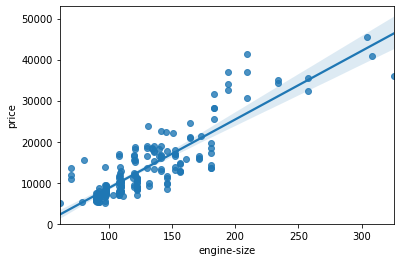

In [12]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p> Note que conforme o tamanho do motor aumenta, o preço sobe: isso indica uma correlação direta positiva entre essas duas variáveis. O tamanho do motor parece um bom preditor de preço, já que a linha de regressão é quase uma linha diagonal perfeita. </p>

In [13]:
# Podemos examinar a correlação entre 'engine-size' e 'price' e ver que é aproximadamente 0,87
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<h4> Relação linear Negativa </h4>


<AxesSubplot:xlabel='city-mpg', ylabel='price'>

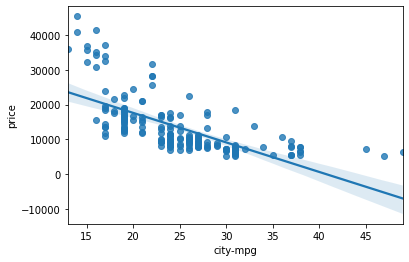

In [14]:
# city-mpg também pode ser um bom preditor para a variável price: 
sns.regplot(x="city-mpg", y="price", data=df)

<p> À medida que o city-mpg sobe, o preço desce: isso indica uma relação inversa / negativa entre essas duas variáveis, podendo ser um indicador de preço. </p>

In [15]:
df[['city-mpg', 'price']].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


<h4> Relação linear neutra (ou fraca) </h4>


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

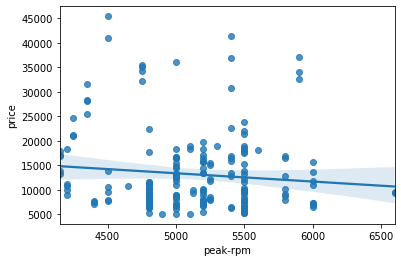

In [16]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p> A variável peak-rpm não parece ser um bom preditor do preço, pois a linha de regressão está próxima da horizontal. Além disso, os pontos de dados estão muito dispersos e distantes da linha ajustada, apresentando grande variabilidade. Portanto, não é uma variável confiável. </p>

In [17]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h2> Variáveis categóricas: </h2>


<p> Essas são variáveis que descrevem uma 'característica' de uma unidade de dados e são selecionadas a partir de um pequeno grupo de categorias. As variáveis categóricas podem ser do tipo "objeto" ou "int64". Uma boa maneira de visualizar variáveis categóricas é usar boxplots. </p>

<AxesSubplot:xlabel='body-style', ylabel='price'>

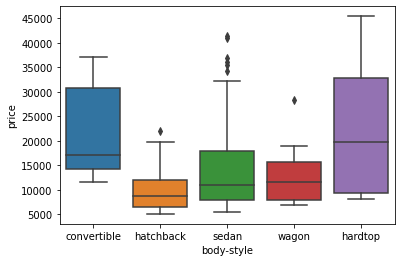

In [18]:
sns.boxplot(x="body-style", y="price", data=df)

Vemos que as distribuições de preço entre as diferentes categorias de body-style têm uma sobreposição significativa e, portanto, body-style não seria um bom preditor de preço. Vamos examinar a "engine-location" e o "price" do motor:

<AxesSubplot:xlabel='engine-location', ylabel='price'>

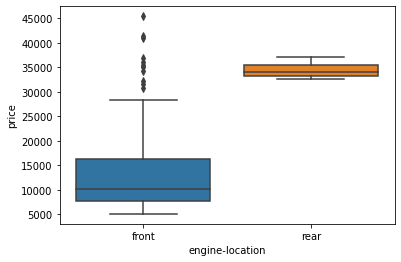

In [19]:
sns.boxplot(x="engine-location", y="price", data=df)

<p> Aqui, vemos que a distribuição de preço entre essas duas categorias de localização do motor, dianteira e traseira, são distintas o suficiente para considerar a localização do motor como um bom indicador de preço em potencial. </p>

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

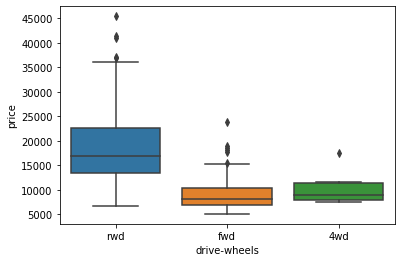

In [20]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p> Aqui vemos que a distribuição de preço entre as diferentes categorias de drive-wheels difere e podem ser um indicador de preço. </p>

<h2> Estatística Descritiva </h2>


<p> Vamos primeiro dar uma olhada nas variáveis usando um método de descrição. </p>

<p> A função <b> describe </b> calcula automaticamente estatísticas básicas para todas as variáveis contínuas. Quaisquer valores NaN são automaticamente ignorados nessas estatísticas. </p>

Isso mostrará:

<ul>
      <li> a contagem dessa variável </li>
      <li> a média </li>
      <li> o desvio padrão (std) </li>
      <li> o valor mínimo </li>
      <li> o IQR (intervalo interquartil: 25%, 50% e 75%) </li>
      <li> o valor máximo </li>
<ul>

In [21]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [22]:
# A configuração padrão de "describe" ignora variáveis do tipo de objeto. 
# Podemos aplicar o método "describe" nas variáveis do tipo 'objeto' da seguinte forma:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Value Counts</h3>

A contagem de valores é uma boa maneira de entender quantas unidades de cada característica / variável temos. 
Podemos aplicar o método "value_counts" na coluna 'drive-wheels'. 
Não se esqueça que o método "value_counts" só funciona na série Pandas, não nos Dataframes Pandas. 
Por isso, incluímos apenas um colchete "df ['drive-wheels']" e não dois colchetes "df [['drive-wheels']]".


In [12]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [17]:
# nós podemos converter a série para um dataframe:

df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [18]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [19]:
# vamos renomear o index para 'drive-wheels':

drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [20]:
# repetindo o processo para engine-location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,198
rear,3


<h2>Agrupando</h2>


<p> O método "groupby" agrupa os dados por categorias diferentes. Os dados são agrupados com base em uma ou várias variáveis e a análise é realizada nos grupos individuais. </p>

<p> Por exemplo, vamos agrupar pela variável "drive-wheels". Vemos que existem 3 categorias diferentes de rodas motrizes. </p>

In [22]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p> Se quisermos saber, em média, qual tipo de drive-wheels é mais valiosa, podemos agrupar "drive-wheels" e depois fazer a média delas. </p>

<p> Podemos selecionar as colunas 'drive-wheels', 'body-style' e 'price' e, em seguida, atribuí-las à variável "df_group_one". </p>

In [23]:
df_group_one = df[['drive-wheels','body-style','price']]

In [24]:
# Podemos então calcular o preço médio para cada uma das diferentes categorias de dados
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p> Pelos nossos dados, parece que os veículos com tração traseira são, em média, os mais caros, enquanto as 4 rodas e as rodas dianteiras têm preços aproximadamente iguais. </p>

<p> Você também pode agrupar com várias variáveis. Por exemplo, vamos agrupar por 'drive-wheels' e 'body-style'. Isso agrupa o dataframe pelas combinações exclusivas 'drive-wheels' e 'body-style'. Podemos armazenar os resultados na variável 'grouped_test1'. </p>

In [25]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Esses dados agrupados são muito mais fáceis de visualizar quando transformados em uma tabela dinâmica. Uma tabela dinâmica é como uma planilha do Excel, com uma variável ao longo da coluna e outra ao longo da linha. Podemos converter o dataframe em uma tabela dinâmica usando o método "pivô" para criar uma tabela dinâmica a partir dos grupos.

Nesse caso, deixaremos a variável da 	drive-wheels como as linhas da tabela e giraremos no estilo do corpo para se tornar as colunas da tabela:

In [26]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

As vezes não teremos dados para algumas das células pivô. Podemos preencher essas células ausentes com o valor 0, mas qualquer outro valor também pode ser usado. Deve ser mencionado que a falta de dados é um assunto bastante complexo...

In [27]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [23]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [25]:
# Correlação de Pearson

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


(0.0, 53022.99756475266)

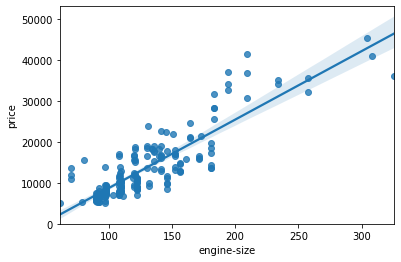

In [26]:
# P-Value

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [27]:
from scipy import stats

In [28]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

In [30]:
print('Pearson: ', pearson_coef)
print('P-Value: ', p_value)

Pearson:  0.584641822265508
P-Value:  8.076488270733218e-20


In [32]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('Pearson: ', pearson_coef)
print('P-Value: ', p_value)

Pearson:  0.8095745670036559
P-Value:  6.369057428260101e-48


In [34]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
X = df[['horsepower']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lm.score(X,Y)

0.6554109795391572

In [70]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'city-mpg']]
Y = df['price']

In [71]:
lm.fit(Z, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lm.score(Z, Y)

0.8091894749269383

In [74]:
lm.intercept_

-14720.186798073595

In [75]:
lm.coef_

array([51.97713509,  4.53468742, 82.46382624, 19.88927076])

In [ ]:
price = -14720.186798073595 + 51.97713509 * horsepower + 4.53468742 * curb-weight + 82.46382624 * engine-size + 19.88927076 *city-mpg 